In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        stats.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        stats.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    sigma2 = stats.invgamma.rvs(a=alpha, scale=beta, size=size)  # Sample sigma^2 from the inverse-gamma
    x = stats.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)  # Sample x from the normal
    return np.vstack((x, sigma2)).transpose()

# Task 1

- Generate 10 samples from the normal-inverse-gamma distribution with parameters as provided below. Each sample corresponds to the mean and variance of a normal distribution.


With these hyperparameters the prior 95% confidence interval for the mean is about [-10, 10] and for the variance [0.1, 10]. In practice you would work the other way around: use confidence intervals to determine values for the prior hyperparameters.


- Plot the 10 normal distributions corresponding to your 10 samples. To see the functions clearly, plot your graphs on the domain [-15, 15]. \


You should see that the 10 samples (normal distributions) are all quite different. This means the prior is quite broad (uncertain) over the mean and variance.


<IPython.core.display.Javascript object>


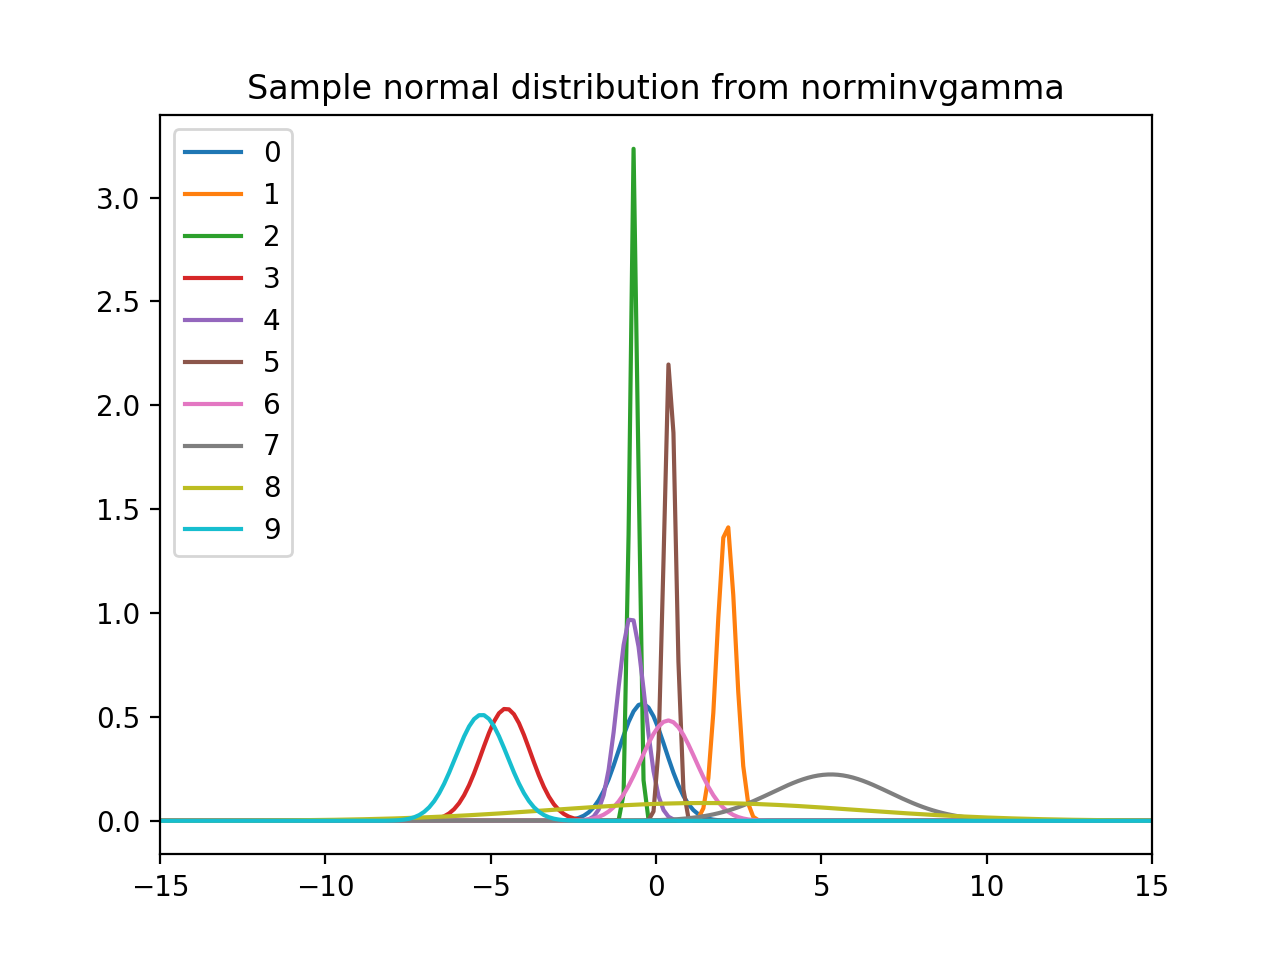

In [5]:
# Normal-inverse-gamma prior hyperparameters
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4

samples = norminvgamma_rvs(mu=mu_0, nu=nu_0, alpha=alpha_0, beta=beta_0, size=10)

x = np.linspace(-15,15,200)
for _ in range(10): 
    plt.plot(x, stats.norm.pdf(x, loc=samples[_,0], scale=samples[_,1]), label=_)
plt.legend(loc=2)
plt.xlim(-15,15)
plt.title('Sample normal distribution from norminvgamma')
plt.show()

# Task 2

- Draw 1,000,000 samples from the normal-inverse-gamma prior above and calculate approximate 95% confidence intervals over the mean and the variance using the samples. You can use the numpy.percentile function for this.


Your confidence intervals should approximately match the intervals [-10, 10] and [0.1, 10].

In [11]:
samples_2 = norminvgamma_rvs(mu=mu_0, nu=nu_0, alpha=alpha_0, beta=beta_0, size=1000000)

In [14]:
print("95% confidence interval for mean:", (np.percentile(samples_2[:,0], 2.5), np.percentile(samples_2[:,0], 97.5)))
print("95% confidence interval for variance:", (np.percentile(samples_2[:,1], 2.5), np.percentile(samples_2[:,1], 97.5)))

95% confidence interval for mean: (-10.036046737651123, 9.976313620554095)
95% confidence interval for variance: (0.10167796695406912, 10.09456545636598)


# Task 3

- Code the equations for calculating the posterior normal-inverse-gamma hyperparameters from the prior hyperparameters and data.


In [6]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])
    
d_mean = np.mean(data)
d_num = len(data)

mu_post = (mu_0*nu_0+d_num*d_mean)/(nu_0+d_num)
nu_post = nu_0+d_num
alpha_post = alpha_0+d_num/2
beta_post = beta_0 + 0.5*np.sum((data-d_mean)**2) + 0.5*((d_num*nu_0)*(d_mean-mu_0)**2)/(d_num+nu_0)


print(mu_post)
print(nu_post)
print(alpha_post)
print(beta_post)

3.0642528412748584
200.054
101.12
362.1750067553398


# Task 4

You are told that the prior information we used above is incorrect. Actually, the prior 95% confidence interval on the mean should be [-15, 15] and on the variance [0.5, 2]. So, the prior over the mean is less certain (broader) than we had before, but the prior over the variance is more certain (narrower).


Determine prior hyperparameters for the normal-inverse-gamma distribution that match the prior information above.

In [4]:
from scipy.optimize import root
from math import factorial

def findab(v): 
    alpha, beta = v
    return (stats.invgamma.cdf(0.5,a=alpha,scale=beta) - 0.025, stats.invgamma.cdf(2,a=alpha,scale=beta) - 0.975)

x = root(findab, (1,1), tol=0.0001)
print(x)

    fjac: array([[-0.55092693, -0.83455349],
       [ 0.83455349, -0.55092693]])
     fun: array([ 1.11611196e-09, -1.55159452e-09])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-3.45471747e-08, -1.21517175e-07])
       r: array([-0.03052033,  0.03097776, -0.01023826])
  status: 1
 success: True
       x: array([8.47481577, 7.53087103])


In [9]:
true_invgamma = stats.invgamma(a=8.47, scale=7.53)
samples_test = true_invgamma.rvs(size=1000000)

print(np.percentile(samples_test, 97.5))
print(np.percentile(samples_test, 2.5))


2.0020957291313843
0.49978044055950843


In [24]:
mean_sigma2 = true_invgamma.mean()
def findmunu(v): 
    nu = v
    sigma2 = mean_sigma2
    return (stats.norm.cdf(-15,loc=0, scale=sigma2/nu) - 0.025)

y = root(findmunu, 0.1, tol=0.0001)
print(y)

    fjac: array([[-1.]])
     fun: array([3.08651542e-11])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.06387353e-07])
       r: array([0.86994452])
  status: 1
 success: True
       x: array([0.13171378])


In [27]:
samples_2 = norminvgamma_rvs(mu=0, nu=0.1317**2/mean_sigma2, alpha=8.47, beta=7.53, size=1000000)

In [28]:
print("95% confidence interval for mean:", (np.percentile(samples_2[:,0], 2.5), np.percentile(samples_2[:,0], 97.5)))
print("95% confidence interval for variance:", (np.percentile(samples_2[:,1], 2.5), np.percentile(samples_2[:,1], 97.5)))

95% confidence interval for mean: (-15.177324062334375, 15.16292770959995)
95% confidence interval for variance: (0.4997243780313898, 1.9995583619685218)


######################################################################################################################

In [35]:
from scipy.optimize import root

def findab(v): 
    alpha, beta = v
    return (stats.invgamma.cdf(2.75-1,a=alpha,scale=beta) - 0.16, stats.invgamma.cdf(2.75+1,a=alpha,scale=beta) - 0.84)

x = root(findab, (1,1), tol=0.0001)
print(x)

    fjac: array([[-0.82442098, -0.56597708],
       [ 0.56597708, -0.82442098]])
     fun: array([ 7.03284375e-10, -9.99008098e-10])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.55164491e-08, -1.43227205e-07])
       r: array([-0.12956823,  0.05366345, -0.01045024])
  status: 1
 success: True
       x: array([ 7.13715467, 17.0256563 ])


In [36]:
true_invgamma = stats.invgamma(a=7.14, scale=17.03)
samples_test = true_invgamma.rvs(size=1000000)

print(np.percentile(samples_test, 16))
print(np.percentile(samples_test, 84))

1.7494608408200456
3.745261382993162


In [37]:
mean_sigma2 = true_invgamma.mean()
def findmunu(v): 
    nu = v
    sigma2 = mean_sigma2
    return (stats.norm.cdf(1.8,loc=2.3, scale=sigma2/nu) - 0.16)

y = root(findmunu, 0.1, tol=0.0001)
print(y)

    fjac: array([[-1.]])
     fun: array([1.31437808e-08])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.08783476e-05])
       r: array([0.04391587])
  status: 1
 success: True
       x: array([5.51648757])


In [40]:
samples_2 = norminvgamma_rvs(mu=2.3, nu=(5.51)**2/mean_sigma2, alpha=7.14, beta=17.03, size=1000000)

In [41]:
print("68% confidence interval for mean:", (np.percentile(samples_2[:,0], 16), np.percentile(samples_2[:,0], 84)))
print("68% confidence interval for variance:", (np.percentile(samples_2[:,1], 16), np.percentile(samples_2[:,1], 84)))

68% confidence interval for mean: (1.8190814396284851, 2.7807847661510863)
68% confidence interval for variance: (1.7475627967383012, 3.7492104548480407)
